In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("car F and P.csv")
data.columns = data.columns.str.strip()
print("\nFirst Some Rows of dataset:")
print(data.head())


First Some Rows of dataset:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Perfo

In [3]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float

In [4]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [5]:
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0],inplace=True)
data['Engine HP'].fillna(data['Engine HP'].median(),inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].mode()[0],inplace=True)
data['Market Category'].fillna(data['Market Category'].mode()[0],inplace=True)
data['Number of Doors'].fillna(data['Number of Doors'].mode()[0],inplace=True)

In [6]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [7]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
numerical_columns = numerical_columns.drop('MSRP')
for col in numerical_columns:
    print(f"\nStatistics of {col}:")
    print(data[col].describe())


Statistics of Year:
count    11914.000000
mean      2010.384338
std          7.579740
min       1990.000000
25%       2007.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: Year, dtype: float64

Statistics of Engine HP:
count    11914.000000
mean       249.256421
std        108.888444
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max       1001.000000
Name: Engine HP, dtype: float64

Statistics of Engine Cylinders:
count    11914.000000
mean         5.624727
std          1.780189
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64

Statistics of Number of Doors:
count    11914.000000
mean         3.436377
std          0.881184
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64

Statistics of highway MPG:
count    11914.00000

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nStatistics of {col}")
    print(data[col].describe())


Statistics of Make
count         11914
unique           48
top       Chevrolet
freq           1123
Name: Make, dtype: object

Statistics of Model
count              11914
unique               915
top       Silverado 1500
freq                 156
Name: Model, dtype: object

Statistics of Engine Fuel Type
count                11914
unique                  10
top       regular unleaded
freq                  7175
Name: Engine Fuel Type, dtype: object

Statistics of Transmission Type
count         11914
unique            5
top       AUTOMATIC
freq           8266
Name: Transmission Type, dtype: object

Statistics of Driven_Wheels
count                 11914
unique                    4
top       front wheel drive
freq                   4787
Name: Driven_Wheels, dtype: object

Statistics of Market Category
count         11914
unique           71
top       Crossover
freq           4852
Name: Market Category, dtype: object

Statistics of Vehicle Size
count       11914
unique          3
top     

In [9]:
print("Duplicated Rows:")
print(data.duplicated().sum())

Duplicated Rows:
715


In [10]:
data = data.drop_duplicates()

In [11]:
print("Duplicated Rows:")
print(data.duplicated().sum())

Duplicated Rows:
0


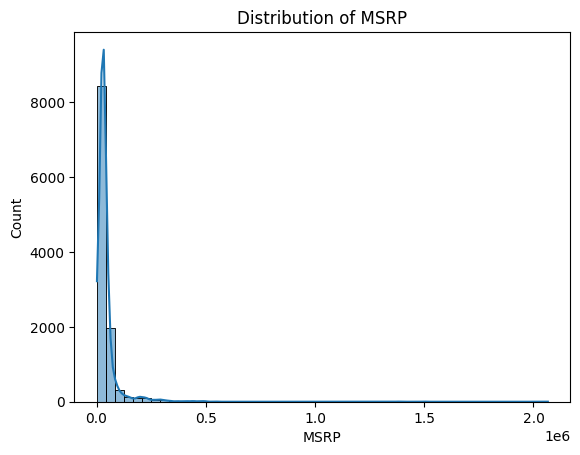

In [12]:
sns.histplot(data['MSRP'],bins=50,kde=True)
plt.title("Distribution of MSRP")
plt.xlabel("MSRP")
plt.ylabel("Count")
plt.show()

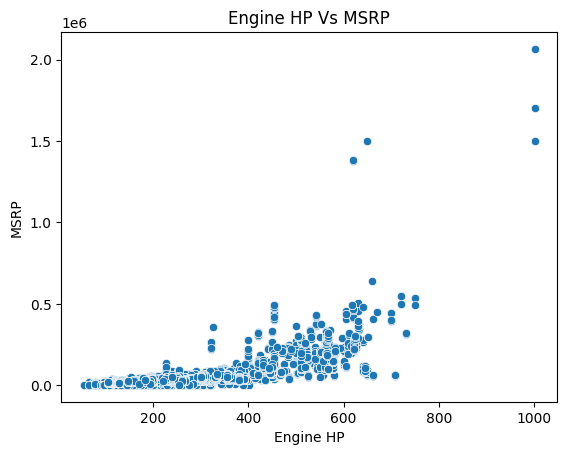

In [13]:
sns.scatterplot(x='Engine HP',y='MSRP',data=data)
plt.title("Engine HP Vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()

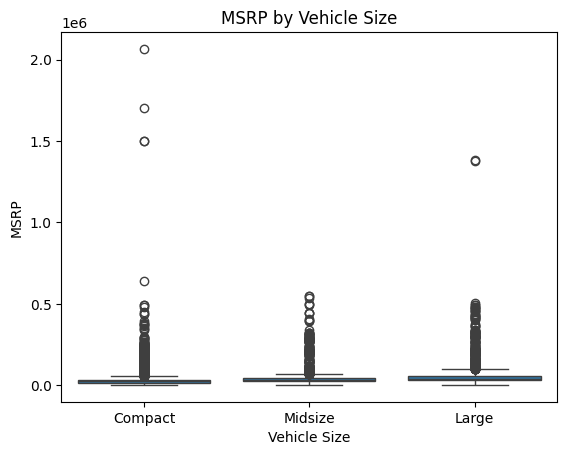

In [14]:
sns.boxplot(x='Vehicle Size',y='MSRP',data=data)
plt.title("MSRP by Vehicle Size")
plt.xlabel("Vehicle Size")
plt.ylabel("MSRP")
plt.show()

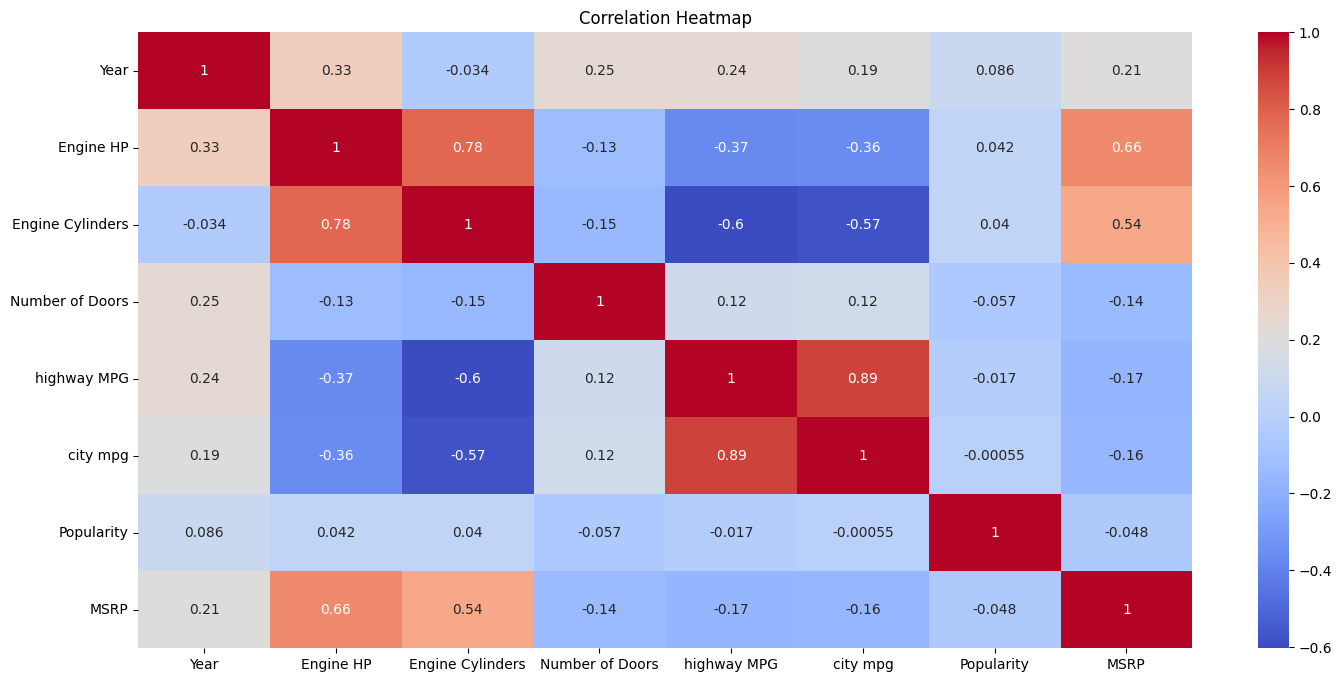

In [15]:
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

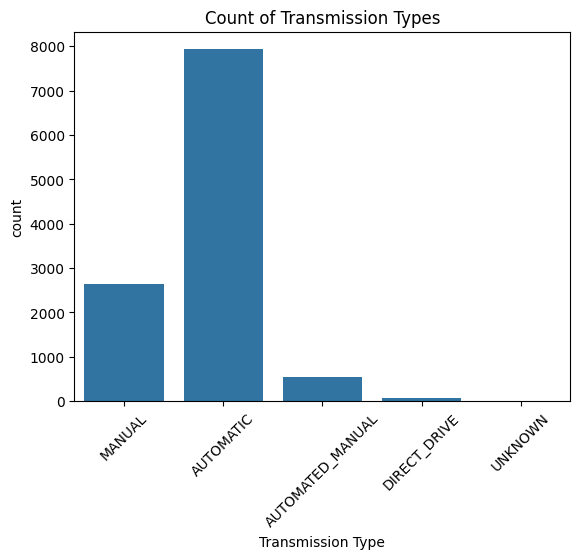

In [16]:
sns.countplot(x='Transmission Type',data=data)
plt.title("Count of Transmission Types")
plt.xticks(rotation=45)
plt.show()

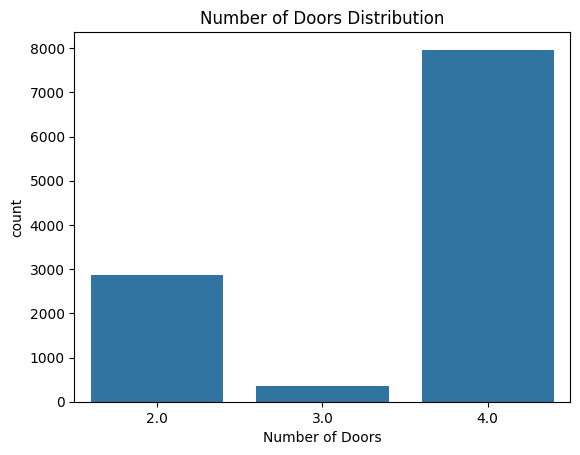

In [17]:
sns.countplot(x='Number of Doors',data=data)
plt.title("Number of Doors Distribution")
plt.show()

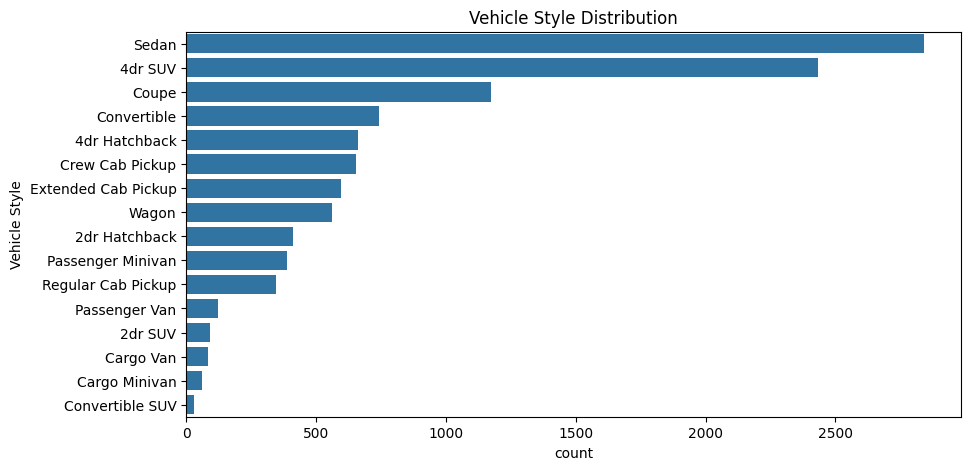

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Vehicle Style', data=data, order=data['Vehicle Style'].value_counts().index)
plt.title("Vehicle Style Distribution")
plt.show()

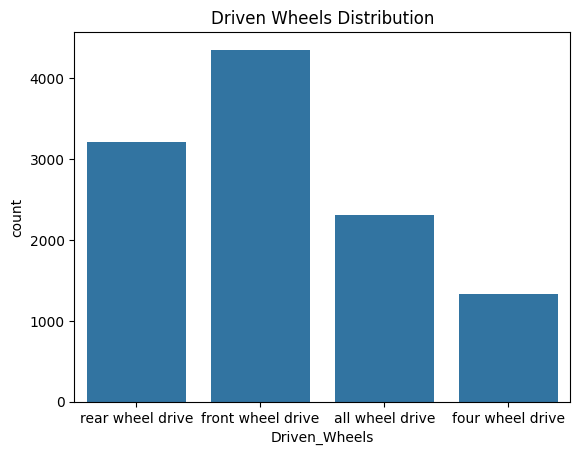

In [19]:
sns.countplot(x='Driven_Wheels', data=data)
plt.title("Driven Wheels Distribution")
plt.show()

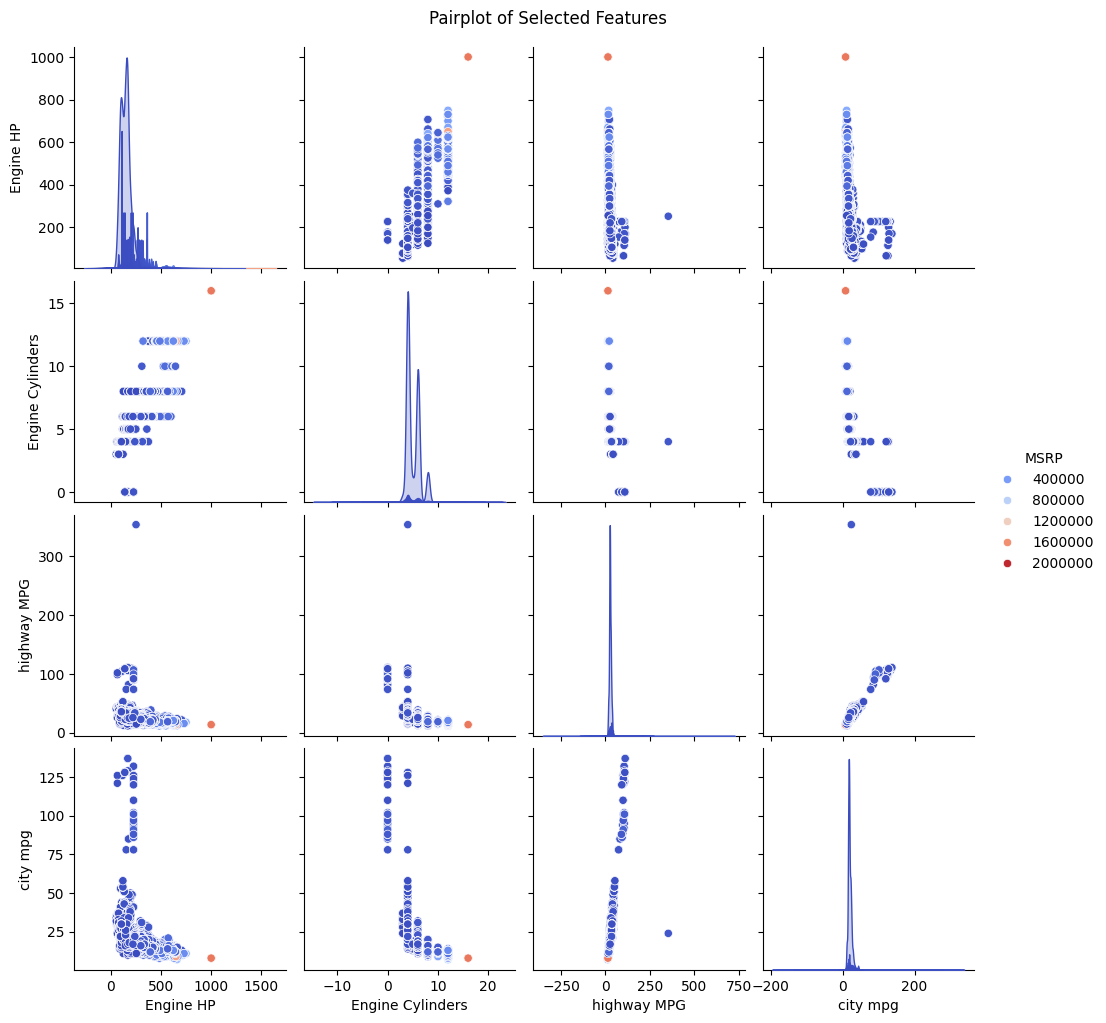

In [20]:
sns.pairplot(data[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg','MSRP']],hue='MSRP',palette='coolwarm')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

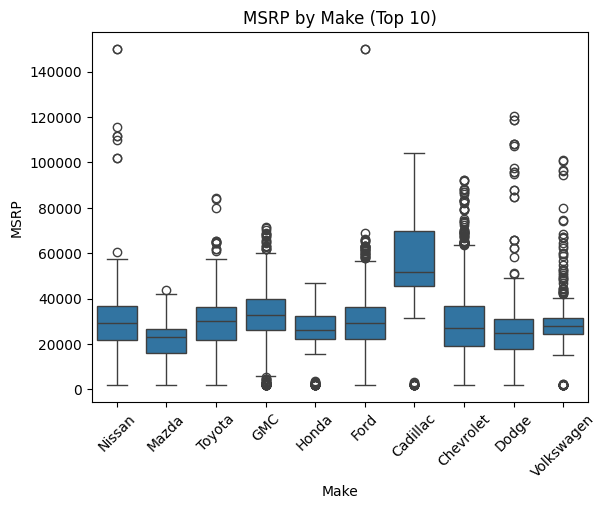

In [21]:
top_makes = data['Make'].value_counts().nlargest(10).index
sns.boxplot(x='Make', y='MSRP', data=data[data['Make'].isin(top_makes)])
plt.title("MSRP by Make (Top 10)")
plt.xticks(rotation=45)
plt.show()

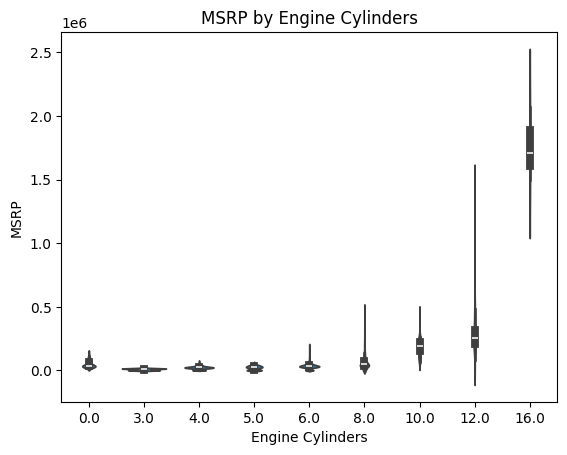

In [22]:
sns.violinplot(x='Engine Cylinders', y='MSRP', data=data)
plt.title("MSRP by Engine Cylinders")
plt.show()

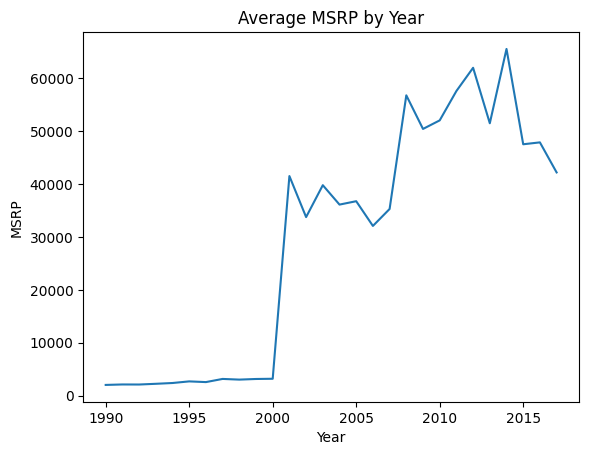

In [23]:
avg_msrp_year = data.groupby('Year')['MSRP'].mean().reset_index()
sns.lineplot(x='Year', y='MSRP', data=avg_msrp_year)
plt.title("Average MSRP by Year")
plt.show()

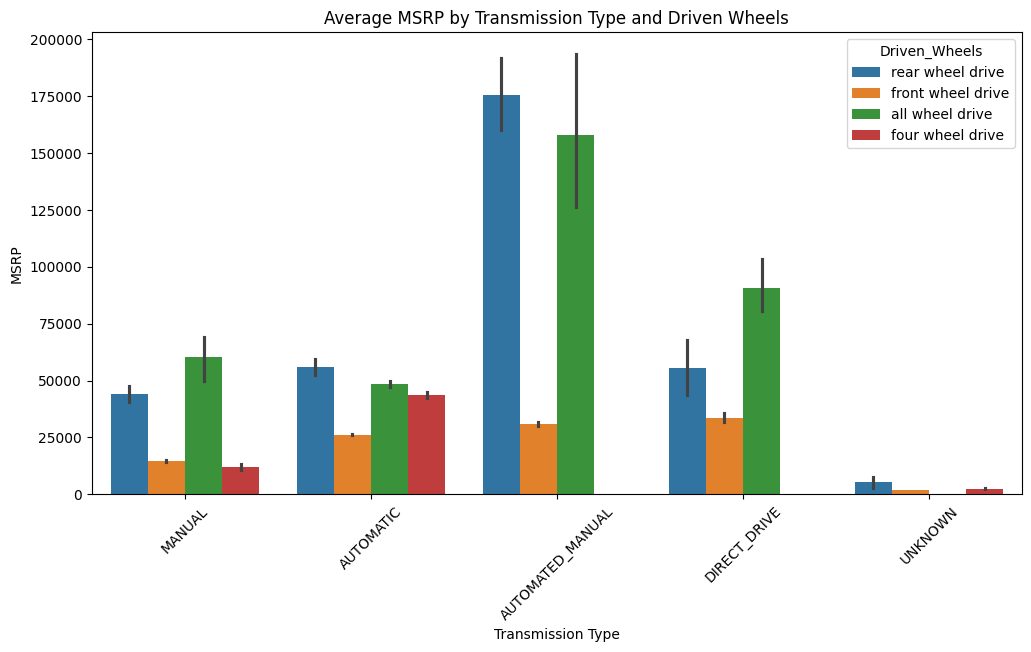

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Transmission Type', y='MSRP', hue='Driven_Wheels', data=data)
plt.title("Average MSRP by Transmission Type and Driven Wheels")
plt.xticks(rotation=45)
plt.show()

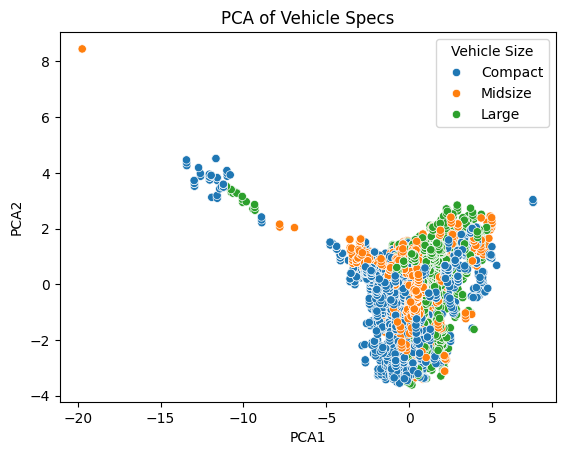

In [25]:
numeric_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=["MSRP"])
scaled_data = StandardScaler().fit_transform(numeric_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]
sns.scatterplot(x='PCA1', y='PCA2', hue='Vehicle Size', data=data)
plt.title("PCA of Vehicle Specs")
plt.show()

In [26]:
X = data[['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity']]
y = data['MSRP']

In [27]:
preprocessor = ColumnTransformer(
    transformers = [
        ('numerical',StandardScaler(),numerical_columns),
        ('categorical',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [28]:
lr_model = Pipeline([
    ("preprocessor",preprocessor),
    ("model",LinearRegression())
])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
lr_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [31]:
y_pred = lr_model.predict(X_test)
print("---------------- Linear Regression Results ---------------")
print(f"\nMean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")

---------------- Linear Regression Results ---------------

Mean Squared Error (MSE): 140875530.34
R2 Score: 0.97


In [32]:
rf_model = Pipeline([
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor(random_state=42))
])

In [33]:
rf_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [34]:
y_pred = rf_model.predict(X_test)
print("--------------- Random Forest Results ---------------")
print(f"\nMean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")

--------------- Random Forest Results ---------------

Mean Squared Error (MSE): 474441874.86
R2 Score: 0.90


In [35]:
param_grid_rf = {
    "model__n_estimators": [50,100],
    "model__max_depth": [None,10,20],
    "model__min_samples_split": [2,5]
}

In [36]:
grid_search = GridSearchCV(rf_model,param_grid_rf,cv=3,scoring="r2",n_jobs=-1)
grid_search.fit(X_train,y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [37]:
print("--------------- Tuned Random Forest Results ---------------")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f} ")
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")

--------------- Tuned Random Forest Results ---------------
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Mean Squared Error (MSE): 555305963.90 
R2 Score: 0.89


In [38]:
gb_model = Pipeline([
    ("preprocessor",preprocessor),
    ("model",GradientBoostingRegressor(random_state=42))
])

In [39]:
gb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [40]:
y_pred = gb_model.predict(X_test)
print("--------------- Gradient Boosting Regressor Results ---------------")
print(f"Mean Sqaured Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")

--------------- Gradient Boosting Regressor Results ---------------
Mean Sqaured Error (MSE): 203470417.98
R2 Score: 0.96


In [41]:
xgb_model = Pipeline([
    ("preprocessor",preprocessor),
    ("model",XGBRegressor(random_state=42))
])

In [42]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [43]:
y_pred = xgb_model.predict(X_test)
print("--------------- XGB Regressor Results ---------------")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test,y_pred):.2f}")

--------------- XGB Regressor Results ---------------
Mean Squared Error (MSE): 163604522.53
R2 Score: 0.97


In [44]:
data['predicted MSRP'] = np.maximum(0,lr_model.predict(X))
data['predicted MSRP'] = data['predicted MSRP'].replace(0, np.nan)

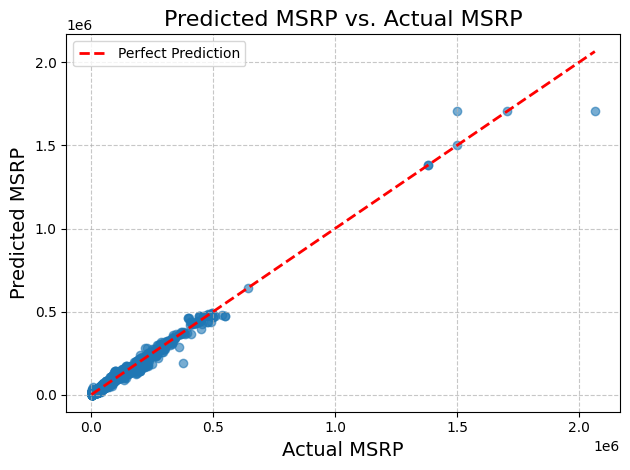

In [45]:
plt.scatter(y, data['predicted MSRP'], alpha=0.6) 

min_val = min(y.min(), data['predicted MSRP'].min())
max_val = max(y.max(), data['predicted MSRP'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Predicted MSRP vs. Actual MSRP', fontsize=16)
plt.xlabel('Actual MSRP', fontsize=14)
plt.ylabel('Predicted MSRP', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend() 
plt.tight_layout() 
plt.show()

In [48]:
data.drop(columns=['PCA1','PCA2'],inplace=True)

In [49]:
data.to_csv("Predicted_Car_Price.csv",index=False)
print("Predicted MSRP added to the dataset and saved.")

Predicted MSRP added to the dataset and saved.
